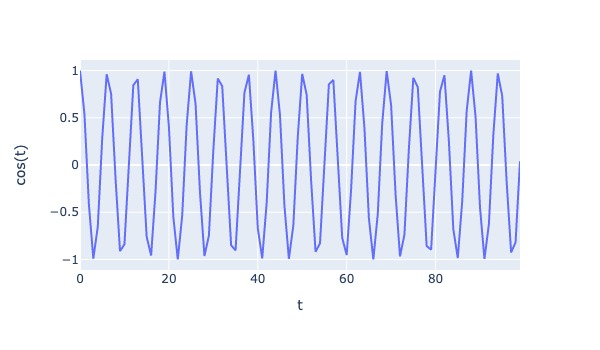

In [1]:
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import cv2
import io
from PIL import Image
from IPython import display
from datetime import datetime
from scipy import signal

# t = np.linspace(0, 2*np.pi, 100)
t = range(100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
# fig.show()
img_bytes = fig.to_image(format="jpg", width=600, height=350)
display.Image(img_bytes)

In [2]:
# open_cv_image = np.array(Image(img_bytes))
image = np.array(Image.open(io.BytesIO(img_bytes))) 
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
print(image.shape)
cv2.imwrite('cosine.jpg', image)

(350, 600, 3)


True

In [6]:
aorta_widths = np.load('runs/aorta_widths.npy')
new_y = []
# region smoothing: method 2, keep the peaks
# peaks = signal.find_peaks(aorta_widths, height=0.5, distance=40)

# # smooth the values between the peaks
# start = 0
# end = peaks[0][0]
# new_y.extend(signal.savgol_filter(aorta_widths[start:end], end-start, 2))
# for i in range(len(peaks[0])-1):
#     start = peaks[0][i] + 1
#     end = peaks[0][i+1]
#     new_y.append(aorta_widths[peaks[0][i]]) # add peak value
#     new_y.extend(signal.savgol_filter(aorta_widths[start:end],
#                                       end-start, # window size used for filtering
#                                       2)) # order of fitted polynomial
# # add the last peak
# new_y.append(aorta_widths[peaks[0][-1]])
# start = peaks[0][-1] + 1
# end = len(aorta_widths)
# new_y.extend(signal.savgol_filter(aorta_widths[start:end], end-start, 2))
# # endregion

# region smoothing: method 1, do not keep the peaks
window_size = 53
if len(aorta_widths) < window_size:
    window_size = len(aorta_widths) - 1
new_y = signal.savgol_filter(aorta_widths, window_size, 3)
# endregion
assert len(new_y) == len(aorta_widths)

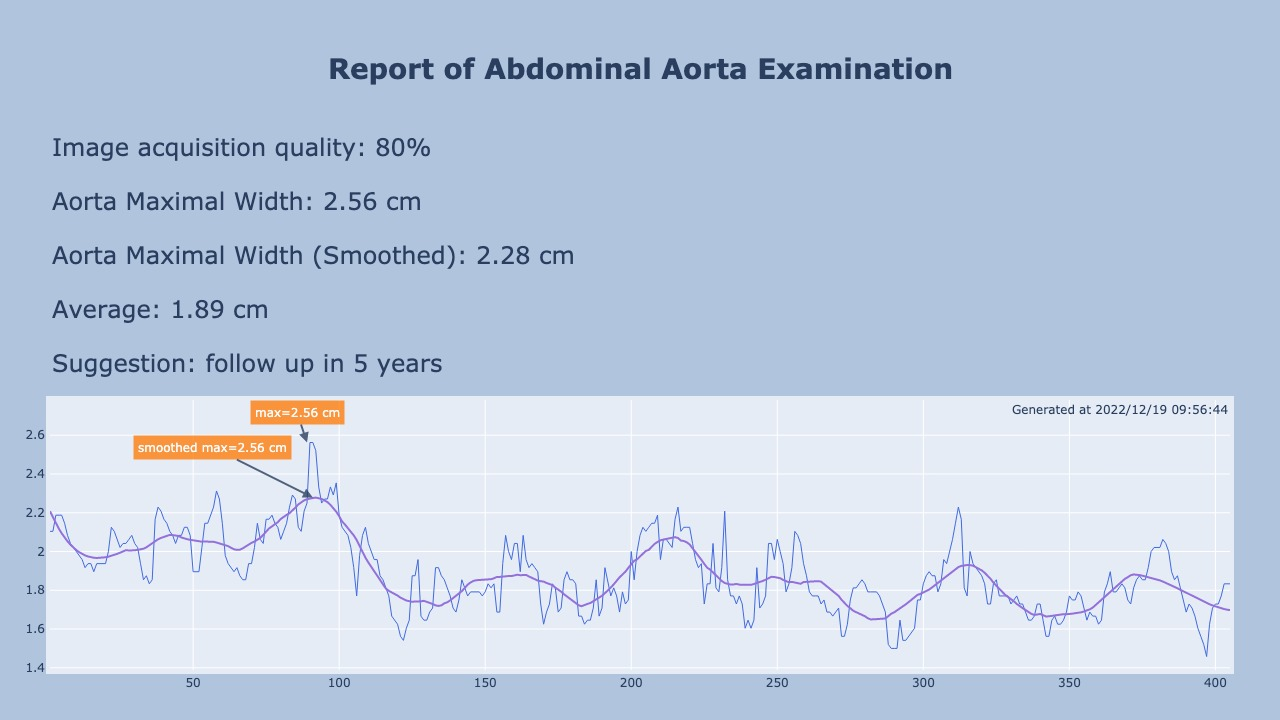

In [17]:
width = 1280
height = 720

x = np.arange(1, len(aorta_widths)+1, dtype=int)
# fig = px.line(
#     x=range(len(aorta_widths)),
#     y=aorta_widths,
#     labels={"x": "t", "y": "Aorta width (cm)"},
# )
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=aorta_widths, mode='lines', line=dict(color='royalblue', width=1)))
fig.add_trace(
    go.Scatter(
        x=x,
        # y=smoothed_y[0],
        y=new_y,
        mode='lines',
        marker=dict(
            size=3,
            color='mediumpurple',
            # symbol='triangle-up'
        ),
        # name='Savitzky-Golay'
    )
)
# fig.add_trace(px.line(x=x, y=aorta_widths, labels={"x": "t", "y": "Aorta width (cm)"}).data[0])
fig.update_layout(
    autosize=False,
    width=width // 2,
    height=height // 2,
    margin=dict(l=50, r=50, b=50, t=400, pad=4),
    paper_bgcolor="LightSteelBlue",
    showlegend=False,
)
fig.add_annotation(
    text=f"max={np.max(aorta_widths):.2f} cm",
    x=np.argmax(aorta_widths), y=np.max(aorta_widths),
    xref="x", yref="y", showarrow=True,
    font=dict(color="#ffffff"),
    arrowhead=2, arrowsize=1, arrowwidth=2,
    borderpad=4, bgcolor="#ff7f0e", opacity=0.8
)
fig.add_annotation(
    text=f"smoothed max={np.max(new_y):.2f} cm",
    x=np.argmax(new_y), y=np.max(new_y),
    xref="x", yref="y", showarrow=True,
    font=dict(color="#ffffff"),
    arrowhead=2, arrowsize=1, arrowwidth=2, ax=-100, ay=-50,
    borderpad=4, bgcolor="#ff7f0e", opacity=0.8
)
fig.add_annotation(
  text="<b>Report of Abdominal Aorta Examination</b>", xref="paper", yref="paper",
  x=0.5, y=2.3, showarrow=False, font=dict(size=28)
)
fig.add_annotation(
  text="Image acquisition quality: 80%", xref="paper", yref="paper",
  x=0, y=2.0, showarrow=False, font=dict(size=24)
)
fig.add_annotation(
  text=f"Aorta Maximal Width: {np.max(aorta_widths):.2f} cm",
  xref="paper", yref="paper", x=0, y=1.8, showarrow=False, font=dict(size=24)
)
fig.add_annotation(
  text=f"Aorta Maximal Width (Smoothed): {np.max(new_y):.2f} cm",
  xref="paper", yref="paper", x=0, y=1.6, showarrow=False, font=dict(size=24)
)
fig.add_annotation(
  text=f"Average: {np.mean(aorta_widths):.2f} cm",
  xref="paper", yref="paper", x=0, y=1.4, showarrow=False, font=dict(size=24)
)
fig.add_annotation(
  text="Suggestion: follow up in 5 years",
  xref="paper", yref="paper", x=0, y=1.2, showarrow=False, font=dict(size=24)
)
dt_outformat = "%Y/%m/%d %I:%M:%S"
timestamp = f"Generated at {datetime.now().strftime(dt_outformat)}"
fig.add_annotation(
  text=timestamp,
  xref="paper", yref="paper", x=1, y=1, showarrow=False,
)

# display.Image(fig.to_image(format="jpg", width=width, height=height))
img_bytes = fig.to_image(format="jpg", width=width, height=height)
chart = np.array(Image.open(io.BytesIO(img_bytes)))
# chart = cv2.cvtColor(chart, cv2.COLOR_RGB2BGR)
im = Image.fromarray(chart)
# im.size
im

In [5]:

im = np.zeros((height, width, 3), np.uint8)
im = cv2.putText(
    im,
    "Generating report...",
    (width // 2, height // 2),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (255, 255, 255),
    3,
)
cv2.imwrite("loading.jpg", im)

True